# Matchmaking

We have with us a sampling of chess games over a span of a 100 month period. Here, we compute each player's Elo score, after which we take all of the scores, and plot it into a histogram. Afterwards, we randomly match each players to another player to see the scatter of the matches.

In [1]:
import csv

# Parse the dataset
with open('training_data.csv') as f:
    reader = csv.reader(f)
    next(reader)
    rows = list(reader)

In [2]:
# To make life easier, declare some functions.

def expected(a, b):
    '''
    Computes the expected score, between the first player
    and the second player.
    
    Keyword arguments:
    a -- the elo score of the first player
    b -- the elo score of the second player
    '''
    return 1 / (1 + 10 ** ((b - a) / 400))

def elo(current, exp, score, k):
    '''
    Computes the elo score of the player, given the expected
    score, the actual score, and a k-factor.
    
    current -- the current elo score
    exp -- the expected score
    score -- the actual score
    k -- the k-factor
    '''
    return current + k * (score - exp)

def for_white(score):
    '''
    Computes the score for the white player.
    
    score -- the score that is either 0, 0.5, or 1 as a string
    '''
    return float(score)

def for_black(score):
    '''
    Computes the score for the black player.
    
    score -- the score that is either 0, 0.5, or 1 as a string
    '''
    if score == '1':
        return 0
    elif score == '0':
        return 1
    
    return float(score)

Let $a$ be the current Elo score of the first player, and $b$ be the Elo score of the opposing player, then we first want to compute the expected value, which is the following:

$$s_{\text{expected}} = \frac{1}{1 + 10^{(b - a)/400}}$$

The above expected value is calculated *before* a match, and *not* after.

Then, if the player associated with $a$ wins, then they are awarded a score of $1$. If they lose, then they are awarded a score of $0$. Otherwise, if they draw with their opponent, then they are awarded a score of $0.5$. Let the score be represented by $s$.

Afterwards, we want to compute the Elo score.

$$a + k \times (s - s_{\text{expected}})$$

We do the same for player associated with $b$.

In [3]:
players = {}

for row in rows:
    wp = row[1]
    bp = row[2]

    players[wp] = 750 if not wp in players else players[wp]
    players[bp] = 750 if not bp in players else players[bp]

    exp_white = expected(players[wp], players[bp])
    exp_black = expected(players[bp], players[wp])
    
    elo_white = elo(players[wp], exp_white, for_white(row[3]), 32)
    elo_black = elo(players[bp], exp_black, for_black(row[3]), 32)
    
    players[wp] = elo_white
    players[bp] = elo_black

In [4]:
players_list = []

for key in players:
    player = {
        'id': key,
        'rating': players[key]
    }
    players_list.append(player)

In [5]:
import matplotlib.pyplot
import seaborn as sns

Below, we are plotting the distribution of the Elos score.

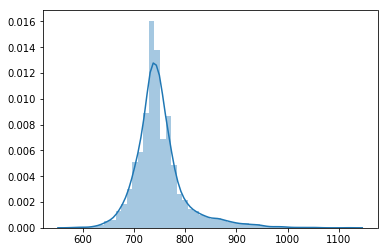

In [6]:
sns.distplot([ player['rating'] for player in players_list ])
matplotlib.pyplot.show()

And here, for all $n$ players, if we are to randomly pick some arbitrary $m \leq n$ players, and then pick the player that has the closest Elo score to an opposing player, and then plot out the matched players, we get the following scatter.

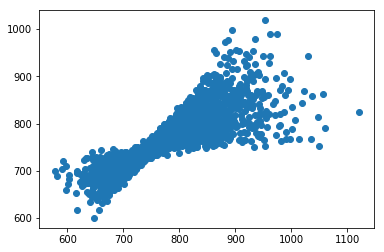

In [7]:
import pylab
import random

random.shuffle(players_list)

x = []
y = []

for player in players_list:

    # TODO: plausible bias here.
    sample = random.sample(players_list, 10)

    matched_player = None
    min_dif = float('inf')
    for random_player in sample:
        if random_player['id'] is not player['id']:
            dif = abs(random_player['rating'] - player['rating'])
            if dif < min_dif:
                min_dif = dif
                matched_player = random_player
    x.append(player['rating'])
    y.append(matched_player['rating'])

matplotlib.pyplot.scatter(x,y)

matplotlib.pyplot.show()